# CSE 151A Group Project: Regression Model

In [5]:
# All of our imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
import warnings

Run to suppress warnings when running code

In [6]:
warnings.filterwarnings('ignore')

First, we must get our processed data to train the model

In [7]:
input_df = pd.read_csv('processed_input.csv')
output_df = pd.read_csv('processed_output.csv')
display(input_df)
display(output_df)

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,0.735956,0.0,0.000759,1.0,0.0,0.066667,0.0,0.002761,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.577049,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.523716,0.0,0.000759,1.0,0.0,0.066667,0.0,0.004852,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.573115,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003052,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493989,0.0,0.000759,1.0,0.0,0.066667,0.0,0.003168,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168318,0.467760,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.000000,0.000070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168319,0.577486,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003168,0.006012,0.000164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168320,0.704044,0.0,0.000759,1.0,1.0,0.066667,0.0,0.002587,0.005010,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168321,0.447213,0.0,0.000759,1.0,1.0,0.066667,0.0,0.005782,0.002004,0.000199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,review_scores_rating
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
168318,100.0
168319,100.0
168320,100.0
168321,100.0


It is important to separate our data into testing, validation and training data, we will have a testing proportion of 0.2 and a validation proportion of 0.2

In [8]:
X_train, X_test, y_train, y_test = train_test_split(input_df,output_df, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

print(f'Training data shapes: {X_train.shape}, {y_train.shape}')
print(f'Validation data shapes: {X_val.shape}, {y_val.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')

Training data shapes: (107726, 247), (107726, 1)
Validation data shapes: (26932, 247), (26932, 1)
Test data shape: (33665, 247), (33665, 1)


Let's start off by just putting the data into a linear regression model with no other changes to the input data, we will use mean squared error as our loss function due to this being a regression problem

In [9]:
validation_error_list = []
training_error_list = []

In [10]:
# Do basic fitting
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

# Show our starting off point for error
yhat_val = lin_model.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
validation_error_list.append(np.log(val_error))
print('Validation Error:',val_error)

yhat_train = lin_model.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
training_error_list.append(np.log(train_error))
print('Training Error:',train_error)

Validation Error: 2.1475201611000026e+18
Training Error: 90.62305538590101


In [11]:
lin_model.coef_

array([[ 2.45039596e+00,  3.52355179e+00, -1.03031796e+01,
         1.41757814e+00,  3.49339041e-01, -4.45703928e+00,
         3.74995052e+00,  1.60527451e+01,  6.46601251e-01,
        -7.79942877e+00, -1.29314188e+00, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+10,
        -7.91504227e+10, -2.84301368e+09, -7.91504227e+10,
        -7.91504227e+10, -7.91504227e+10, -7.91504227e+1

This is obviously an absurd error for outputs that should be so small in comparison

When looking at the coefficients, there are several coefficients that are insanely large, like -1.16e+11

In order to counteract some of this issue, we will implement a Ridge linear regression to punish large coefficients like that to hopefully lower the error

This also seems to be a clear sign of overfitting, but we will use Ridge first and then start focusing on looking into fixing some of the overfitting issues

In [12]:
# Train new ridge model
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

# Recalculate validation and train error
yhat_val = ridge_model.predict(X_val)
val_error = mean_squared_error(y_val,yhat_val)
validation_error_list.append(np.log(val_error))
print('Validation Error:',val_error)

yhat_train = ridge_model.predict(X_train)
train_error = mean_squared_error(y_train,yhat_train)
training_error_list.append(np.log(train_error))
print('Training Error:',train_error)

Validation Error: 88.11948517309538
Training Error: 90.63530505276604


In [13]:
ridge_model.coef_

array([[ 2.44487069e+00,  3.52453848e+00, -1.02086673e+01,
         1.41643058e+00,  3.52019188e-01, -4.42323342e+00,
         3.58534863e+00,  1.50011090e+01,  6.24621609e-01,
        -6.50489003e+00, -1.29591604e+00,  5.01522421e-01,
         2.92537729e+00, -5.78476262e+00,  2.41741093e+00,
        -1.68207410e+00,  3.11483769e+00,  9.23352046e-01,
         1.14592253e+00,  3.75808527e+00,  4.40370924e+00,
        -2.20211917e-01, -1.68836999e-01,  2.75035809e-01,
         1.17543774e+00,  3.23255932e-01, -3.01591663e-01,
         1.52789728e+00,  4.31309897e+00,  1.30541739e+00,
         4.00360988e-01,  1.08081159e+00, -2.56509463e+00,
        -4.26494020e+00,  6.69564656e-01, -3.19372525e-01,
        -3.22605537e-02, -3.52487243e+00, -1.08211704e+00,
         1.87245723e-01, -1.83811177e+00,  1.15845459e+00,
        -1.22363383e-01,  2.04330397e+00,  1.24438759e+00,
         1.35771724e+00,  0.00000000e+00,  2.77550218e+00,
        -2.49544921e+00, -3.62671119e-01,  3.40156255e+0

This is clearly a lot more reasonable of an error and all of the model coefficients also seem reasonable in scale

Before we work on reducing the number of features, we will expand by finding polynomial features of the non-binary categories

In [14]:
numeric_cols = ['host_since', 'host_total_listings_count', 'accommodates',
       'bedrooms', 'price', 'minimum_nights', 'maximum_nights']

def make_polynomial_data(X, degree = 3):
    poly = PolynomialFeatures(degree,include_bias=False)

    # Separate the binary and non-binary columns apart
    X_non_binary = X[numeric_cols]
    X_binary = X.loc[:,~X.columns.isin(numeric_cols)]
    # Get the polynomial features
    X_poly = pd.DataFrame(poly.fit_transform(X_non_binary),columns=poly.get_feature_names_out())
    # Return the recombined dataframes
    return pd.concat([X_poly,X_binary.set_index(X_poly.index)],axis=1)

make_polynomial_data(X_train)

,host_since,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights,host_since^2,host_since host_total_listings_count,host_since accommodates,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,0.635191,0.000759,0.200000,0.020408,0.004039,0.002004,0.013138,0.403468,0.000482,0.127038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.746230,0.003035,0.200000,0.020408,0.003168,0.000000,0.013138,0.556858,0.002265,0.149246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.233880,0.000759,0.066667,0.000000,0.011919,0.000000,0.013138,0.054700,0.000177,0.015592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.178579,0.002276,0.200000,0.000000,0.002380,0.001002,0.004255,0.031891,0.000406,0.035716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.634536,0.001517,0.000000,0.000000,0.001431,0.029058,0.003495,0.402635,0.000963,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107721,0.313224,0.000759,0.200000,0.000000,0.004097,0.000000,0.000234,0.098109,0.000238,0.062645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107722,0.396721,0.094841,0.133333,0.000000,0.002856,0.029058,0.004255,0.157388,0.037625,0.052896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107723,0.169399,0.000759,0.133333,0.000000,0.002006,0.000000,0.000327,0.028696,0.000129,0.022587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107724,0.602623,0.000759,0.200000,0.000000,0.004039,0.001002,0.013138,0.363154,0.000457,0.120525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have all of the features that could potentially be useful, we now want to limit our model to only choosing the most important features

We will do this through recursive feature elimination in combination with cross validation for stability. We will pass in the ridge_model as the underlying estimator

This will eliminate features that are contributing the least to the overall prediction, which should leave us with only the important features

In [15]:
# Create and fit the model
reduced_model = RFECV(ridge_model, cv=10, step=10)
reduced_model.fit(make_polynomial_data(X_train),y_train)

# Recalculate validation and train error
yhat_val = reduced_model.predict(make_polynomial_data(X_val))
val_error = mean_squared_error(y_val,yhat_val)
validation_error_list.append(np.log(val_error))
print('Validation Error:',val_error)

yhat_train = reduced_model.predict(make_polynomial_data(X_train))
train_error = mean_squared_error(y_train,yhat_train)
training_error_list.append(np.log(train_error))
print('Training Error:',train_error)


Validation Error: 87.67187192058624
Training Error: 90.13256376016736


In [16]:
reduced_model.get_support().sum()

299

Now that we have finalized our model, we will run it on the testing dataset in order to get our testing error.

In [17]:
yhat_test = reduced_model.predict(make_polynomial_data(X_test))
test_error = mean_squared_error(y_test,yhat_test)
test_error_log = np.log(test_error)
print('Testing Error:', test_error)

Testing Error: 90.59044834583132


### Analysis:

Our first initial model, which consisted of a simple Linear Regression model, produced an extremely high validation error of 1.2e+18 in comparison with its training error of 90.6 (around 10^16 times greater). The difference in validation and training error in combination with extreme coefficient values was a clear sign of overfitting and a failure on the model’s part to understand the true importance of different features. We attempted to fix this issue by implementing a Ridge Regression to counter larger coefficients and reduce the error. The Ridge Regression model produced very similar errors between the validation and training dataset of roughly 88.1 and 90.6 respectively. Although much better than the Linear Regression model, we made one more attempt at improving the model by using feature transformation to consider polynomial features and feature removal to remove unnecessary and non-impactful features. However, this ultimately did not improve the model as we had hoped, and our new reduced Ridge Regression model ended up producing very similar errors as the previous Ridge Regression model, 87.7 and 90.1 respectively. Following the training and finalization of our model, we tested the reduced Ridge Regression model on the testing dataset and it produced an error of 90.6.


We can observe that all of the errors are relatively close together, leading us to conclude that we are no longer overfitting, but may be underfitting the data due to the high error values. In terms of where we are on the fitting graph, we are on the left side before the ideal range for model complexity, with a simple model and high predictive errors. We also noticed that the validation error never seemed to increase at all as we increased the model complexity, further indicating that we were before the ideal range for model complexity.


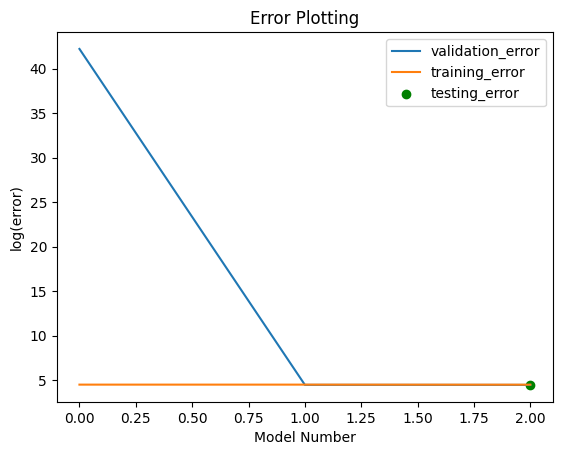

In [18]:
plt.plot(range(len(validation_error_list)),validation_error_list, label='validation_error')
plt.plot(range(len(training_error_list)),training_error_list,label='training_error')
plt.scatter(len(validation_error_list)-1,test_error_log,c='green',label='testing_error')
plt.xlabel('Model Number')
plt.ylabel('log(error)')
plt.title('Error Plotting')
plt.legend()
plt.savefig('images/regression_error_plotting.png')
plt.show()

The error plotting has to be in log to try to plot all the points in the graph, but it is clear that after the first drop in validation error that none of the error significantly changed for the better or worse, but made very marginal improvement

### Conclusion:

Conclusion: Upon exploring a Linear Regression model, we came to the conclusion that Linear Regression is not sufficient for predicting Airbnb's review rating given our dataset. This is demonstrated in both our initial Linear Regression model and our improved reduced Ridge Regression Model. Although consistent, our final model still produced high error values, indicating it was not accurately predicting the rating reviews. One possible area of improvement for this regression model includes further investigation into the importance of each of the features and their relationships with each other to see what the best subset of features truly is to limit the error, but currently, it seems like most changes would not be significant for this model’s improvement and that it would most likely only make a small decrease.
